In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install seaborn


In [4]:
!pip install matplotlib

In [77]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv("basnk loans.csv")
df.head()
df = df.iloc[:-1]

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        15 non-null     float64
 1   NEDBANK LOAN REVENUE        15 non-null     float64
 2   STANDARD BANK LOAN REVENUE  15 non-null     float64
 3   ABSA                        15 non-null     float64
dtypes: float64(4)
memory usage: 608.0 bytes


In [164]:
df['YEAR'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['YEAR'].fillna(0, inplace=True)

# Convert the float column to an integer column
df['YEAR'] = df['YEAR'].astype(int)
df.head()

,YEAR,NEDBANK LOAN REVENUE,STANDARD BANK LOAN REVENUE,ABSA
0,2008,434233000.0,527425000.0,512657000.0
1,2009,450301000.0,525700000.0,487627000.0
2,2010,477226000.0,536421000.0,437233000.0
3,2011,499023000.0,611165000.0,542127000.0
4,2012,527166000.0,785483000.0,567267000.0


In [165]:
years = df['YEAR']
revenue1 = df['NEDBANK LOAN REVENUE']
revenue2 = df['STANDARD BANK LOAN REVENUE']
revenue3 = df['ABSA']


## LINE GRAPHS DIPICTING THE REVENUE NEDBANK, STANDARD BANK & ABSA MADE FROM 2008 to 2022

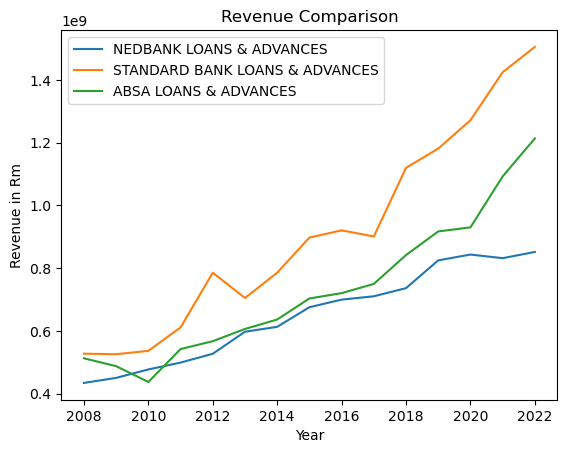

In [166]:
plt.plot(years, revenue1, label='NEDBANK LOANS & ADVANCES')
plt.plot(years, revenue2, label='STANDARD BANK LOANS & ADVANCES')
plt.plot(years, revenue3, label='ABSA LOANS & ADVANCES')
plt.xlabel('Year')
plt.ylabel('Revenue in Rm')
plt.title('Revenue Comparison')
plt.legend()
plt.show()


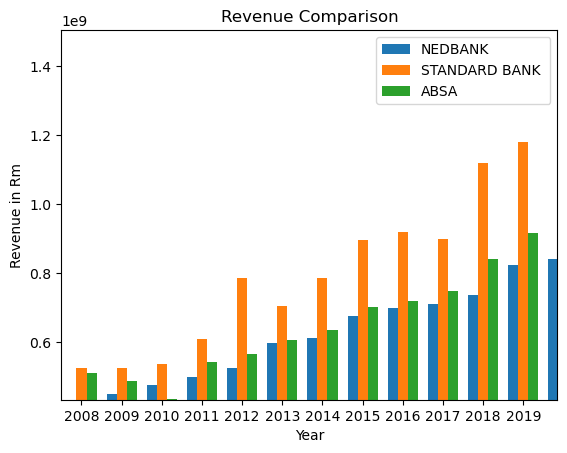

In [167]:
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

# Create the bar graph
plt.bar(r1, revenue1, width=bar_width, label='NEDBANK')
plt.bar(r2, revenue2, width=bar_width, label='STANDARD BANK ')
plt.bar(r3, revenue3, width=bar_width, label='ABSA')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Revenue in Rm')
plt.title('Revenue Comparison')

# Set the x-axis tick labels to the years
plt.xticks([r + bar_width for r in range(len(years))], years)

# Scale the y-axis according to the revenue values
plt.ylim(min(revenue1.min(), revenue2.min(), revenue3.min()) - 10000,
         max(revenue1.max(), revenue2.max(), revenue3.max()) + 10000)

# Scale the x-axis according to the number of years
plt.xlim(-bar_width, len(years) - 2.9)  # Adjust the xlim value here

# Show the legend
plt.legend()

# Display the plot
plt.show()

## NEDBANK LOANS AND ADVANCES

In [168]:
#pick attributes 
Neddf = df[["YEAR","NEDBANK LOAN REVENUE"]]


In [179]:
import sklearn 
from sklearn import linear_model 
from sklearn.utils import shuffle

In [186]:
predict = "NEDBANK LOAN REVENUE"

x = np.array(Neddf.drop([predict],1)) #The features 
y = np.array(Neddf[predict]) #label
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1 )

C:\Users\masi\AppData\Local\Temp\ipykernel_21844\510193752.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(Neddf.drop([predict],1)) #The features


In [187]:

#linear model

linear = linear_model.LinearRegression()
        

In [188]:
print(y)

[4.34233e+08 4.50301e+08 4.77226e+08 4.99023e+08 5.27166e+08 5.97372e+08
 6.13012e+08 6.75484e+08 6.99673e+08 7.10329e+08 7.36305e+08 8.24786e+08
 8.43303e+08 8.31735e+08 8.51560e+08]


In [189]:
print(x)

[[2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]]


In [192]:
#fit model

linear.fit(x_train,y_train)
accuracy = linear.score(x_test,y_test)
print(accuracy * 100 )

96.87743174302756


In [193]:
predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

584991500.3111496 [2013] 597372000.0
485716909.76976776 [2010] 477226000.0


In [195]:

# Split the data into features (x) and labels (y)
x = Neddf["YEAR"].values.reshape(-1, 1)  # Features (YEAR column)
y = Neddf[predict]  # Labels (NEDBANK LOAN REVENUE column)

# Create an instance of LinearRegression model
linear = linear_model.LinearRegression()

# Fit the model on the entire data
linear.fit(x, y)

# Predict for future years
future_years = [2023, 2024, 2025, 2026, 2027]
future_x = pd.DataFrame(future_years, columns=["YEAR"])
future_y = linear.predict(future_x)

# Print the predicted revenue for future years
for year, revenue in zip(future_years, future_y):
    print("Year:", year, "Predicted Revenue:", revenue)


Year: 2023 Predicted Revenue: 916671638.0952377
Year: 2024 Predicted Revenue: 949826359.5238113
Year: 2025 Predicted Revenue: 982981080.952385
Year: 2026 Predicted Revenue: 1016135802.3809509
Year: 2027 Predicted Revenue: 1049290523.8095245


C:\Users\masi\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


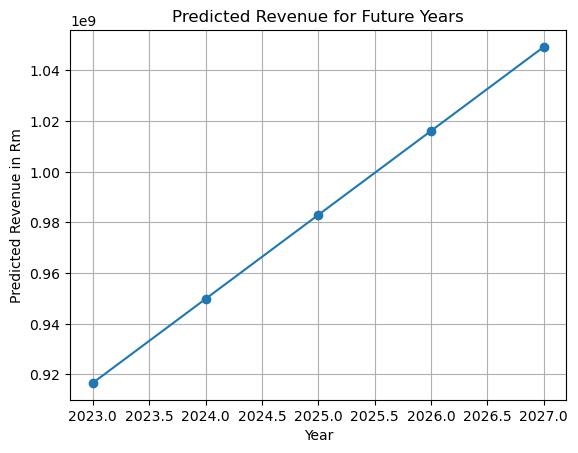

In [197]:
plt.plot(future_years, future_y, marker='o')
plt.xlabel('Year')
plt.ylabel('Predicted Revenue in Rm')
plt.title('Predicted Revenue for Future Years')
plt.grid(True)
plt.show()

## STANDARD BANK LOANS AND ADVANCES 

In [211]:
STDdf = df[["YEAR","STANDARD BANK LOAN REVENUE"]]

In [233]:
predict = "STANDARD BANK LOAN REVENUE"

x = np.array(STDdf.drop([predict],1)) #The features 
y = np.array(STDdf[predict]) #label
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1 )

C:\Users\masi\AppData\Local\Temp\ipykernel_21844\2043653811.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(STDdf.drop([predict],1)) #The features


In [234]:
#linear model
linear = linear_model.LinearRegression()
        

In [235]:
#fit model

linear.fit(x_train,y_train)
accuracy = linear.score(x_test,y_test)
print(accuracy * 100 )

99.56352136064737


In [238]:

x = STDdf["YEAR"].values.reshape(-1, 1)  
y = STDdf[predict]  

# Create an instance of LinearRegression model
linear = linear_model.LinearRegression()

# Fit the model on the entire data
linear.fit(x, y)

# Predict for future years
future_years = [2023, 2024, 2025, 2026]
future_x = pd.DataFrame(future_years, columns=["YEAR"])
future_y = linear.predict(future_x)

# Print the predicted revenue for future years
for year, revenue in zip(future_years, future_y):
    print("Year:", year, "Predicted Revenue:", revenue)

Year: 2023 Predicted Revenue: 1476441790.4761963
Year: 2024 Predicted Revenue: 1546860397.6190796
Year: 2025 Predicted Revenue: 1617279004.7619324
Year: 2026 Predicted Revenue: 1687697611.9047852


C:\Users\masi\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


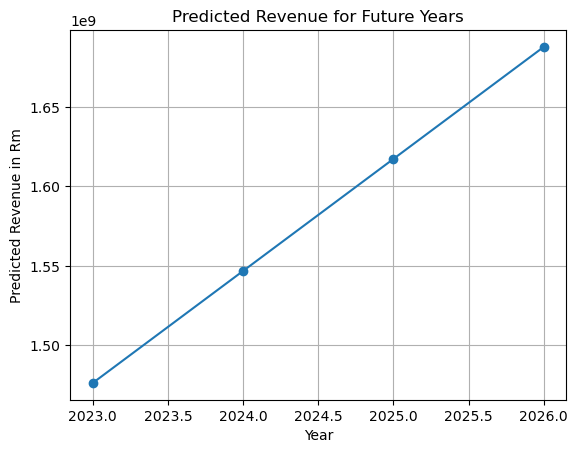

In [239]:
plt.plot(future_years, future_y, marker='o')
plt.xlabel('Year')
plt.ylabel('Predicted Revenue in Rm')
plt.title('Predicted Revenue for Future Years')
plt.grid(True)
plt.show()

## ABSA LOANS & ADVANCES

In [253]:
Adf = df[["YEAR","ABSA"]]

predict = "ABSA"

x = np.array(Adf.drop([predict],1)) #The features 
y = np.array(Adf[predict]) #label
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1 )

C:\Users\masi\AppData\Local\Temp\ipykernel_21844\1582203150.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(Adf.drop([predict],1)) #The features


In [254]:
#linear model
linear = linear_model.LinearRegression()

#fit model

linear.fit(x_train,y_train)
accuracy = linear.score(x_test,y_test)
print(accuracy * 100 )

94.58754210053327


In [255]:

x = Adf["YEAR"].values.reshape(-1, 1)  
y = Adf[predict]  

# Create an instance of LinearRegression model
linear = linear_model.LinearRegression()

# Fit the model on the entire data
linear.fit(x, y)

# Predict for future years
future_years = [2023, 2024, 2025, 2026]
future_x = pd.DataFrame(future_years, columns=["YEAR"])
future_y = linear.predict(future_x)

# Print the predicted revenue for future years
for year, revenue in zip(future_years, future_y):
    print("Year:", year, "Predicted Revenue:", revenue)

Year: 2023 Predicted Revenue: 1121638619.0476074
Year: 2024 Predicted Revenue: 1170533254.7619019
Year: 2025 Predicted Revenue: 1219427890.476181
Year: 2026 Predicted Revenue: 1268322526.1904755


C:\Users\masi\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


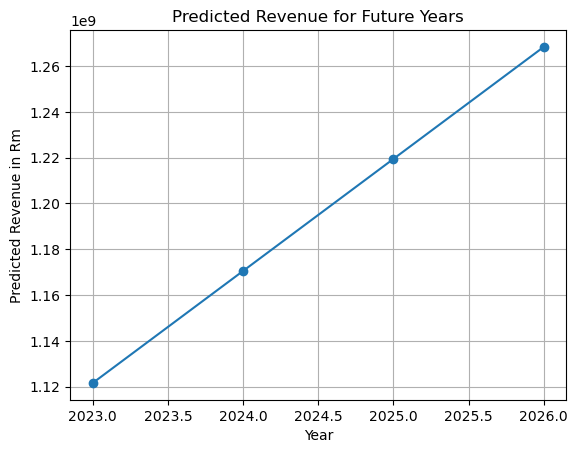

In [256]:
plt.plot(future_years, future_y, marker='o')
plt.xlabel('Year')
plt.ylabel('Predicted Revenue in Rm')
plt.title('Predicted Revenue for Future Years')
plt.grid(True)
plt.show()